In [1006]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [1007]:
df_train=pd.read_csv("train (1).csv")
df_test=pd.read_csv("test.csv")
df_gender=pd.read_csv("gender_submission.csv")

In [1008]:
df_train.shape

(891, 12)

In [1009]:
len(df_train.columns)

12

In [1010]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1011]:
df_test.shape

(418, 11)

In [1012]:
len(df_test.columns)

11

In [1013]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1014]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1015]:
#EDA

In [1016]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1017]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1018]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1019]:
df_train['Pclass']=df_train['Pclass'].astype('object')
df_train['Survived']=df_train['Survived'].astype('object')

In [1020]:
df_num = df_train.select_dtypes(include = ['int64','float64'])
print(df_num.head())

   PassengerId   Age  SibSp  Parch     Fare
0            1  22.0      1      0   7.2500
1            2  38.0      1      0  71.2833
2            3  26.0      0      0   7.9250
3            4  35.0      1      0  53.1000
4            5  35.0      0      0   8.0500


In [1021]:
df_num.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


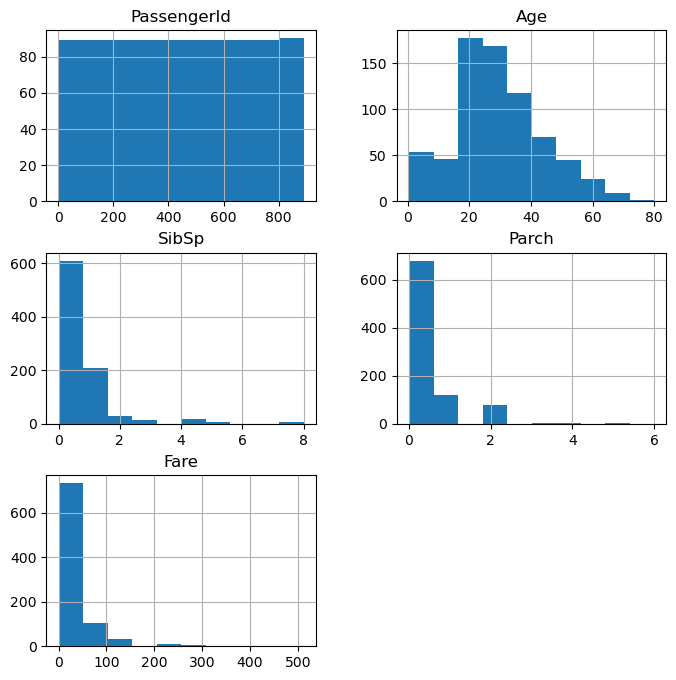

In [1022]:
df_num.hist(figsize=(8,8))
plt.show()


In [1023]:
df_obj = df_train.select_dtypes(include = ['object'])
print(df_obj.head())

  Survived Pclass                                               Name     Sex  \
0        0      3                            Braund, Mr. Owen Harris    male   
1        1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2        1      3                             Heikkinen, Miss. Laina  female   
3        1      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4        0      3                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
0         A/5 21171   NaN        S  
1          PC 17599   C85        C  
2  STON/O2. 3101282   NaN        S  
3            113803  C123        S  
4            373450   NaN        S  


<AxesSubplot: xlabel='Survived', ylabel='count'>

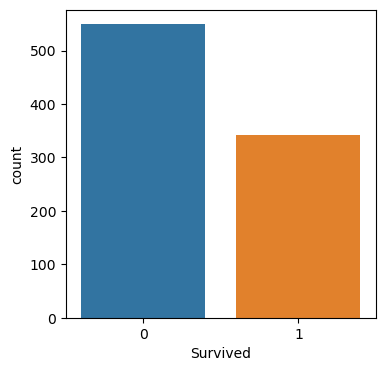

In [1024]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train,x='Survived')


<AxesSubplot: xlabel='Pclass', ylabel='count'>

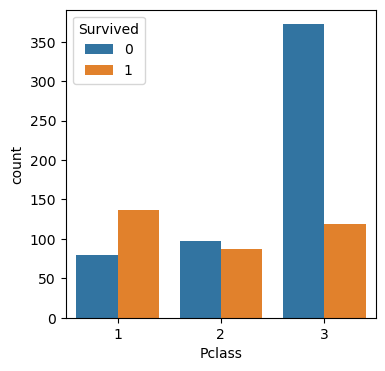

In [1025]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train,x='Pclass',hue='Survived')


<AxesSubplot: xlabel='Sex', ylabel='count'>

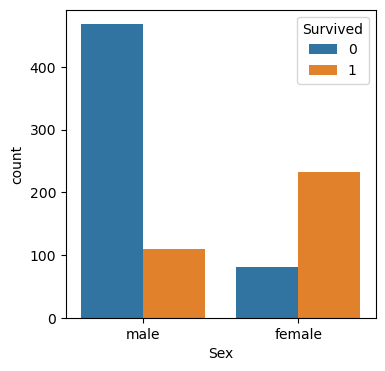

In [1026]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_train,x='Sex',hue='Survived')

In [1027]:
df_train['Survived'].value_counts()  #data is imbalanced

0    549
1    342
Name: Survived, dtype: int64

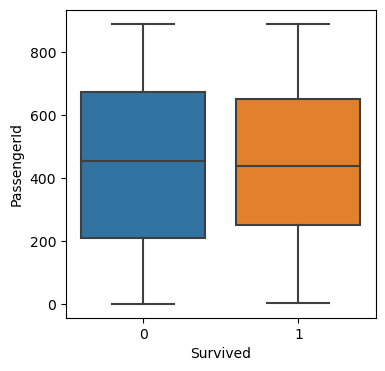

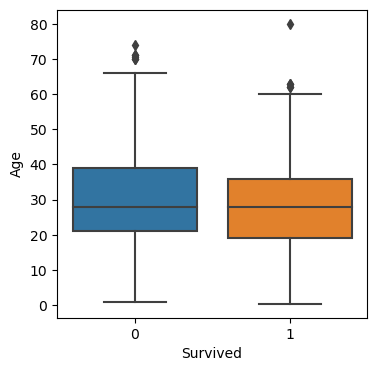

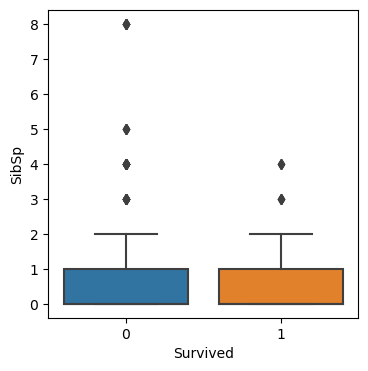

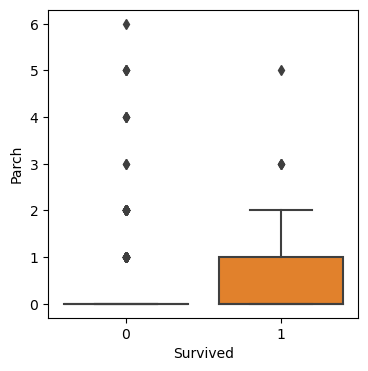

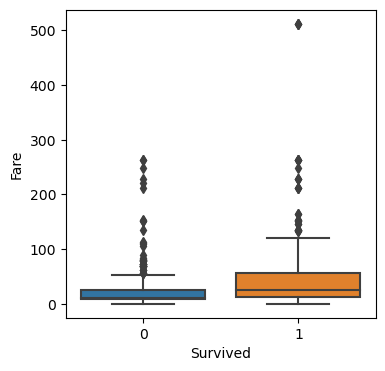

In [1028]:
for i in df_num:
    plt.figure(figsize=(4,4))
    z=sns.boxplot(x=df_train['Survived'],y=df_train[i])

In [1029]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
survival_by_family_size = df_train.groupby('FamilySize')['Survived'].mean()
print(survival_by_family_size)

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [1030]:
survival_by_embarked = df_train.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [1031]:
#Data Preparation

In [1032]:
#missing value treatment

In [1033]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
df_train['Cabin']=df_train['Cabin'].fillna(df_train['Cabin'].mode()[0])
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [1034]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [1035]:
old_skew = df_num.skew().sort_values(ascending=False)
old_skew

Fare           4.787317
SibSp          3.695352
Parch          2.749117
Age            0.389108
PassengerId    0.000000
dtype: float64

In [1036]:
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df_train[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(df_train))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")
    return df_log

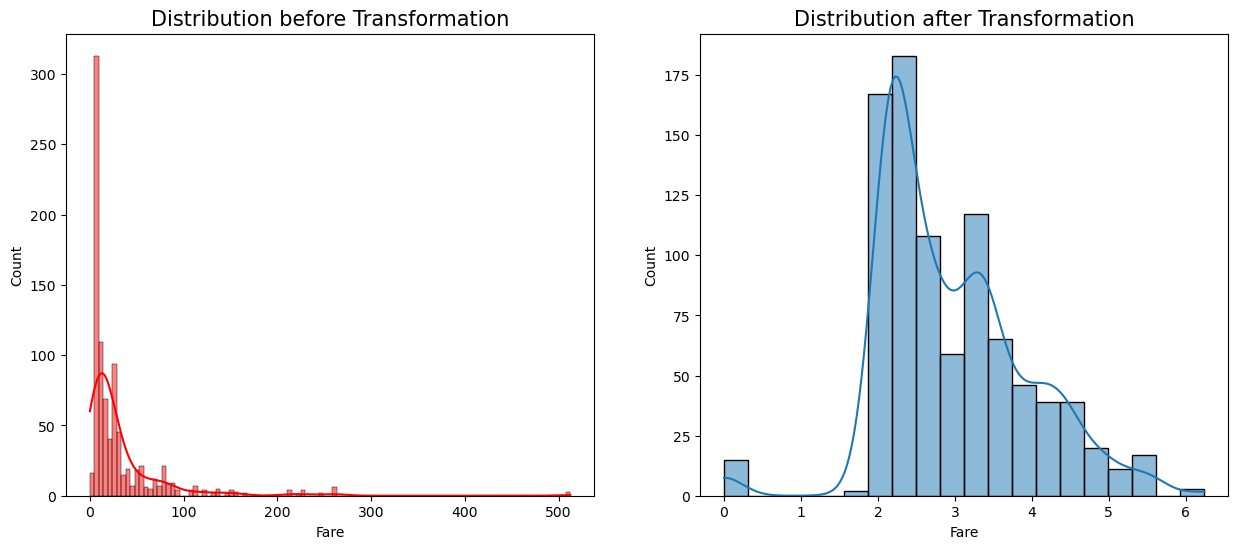

Skewness was 4.79 before & is 0.39 after Log transformation.


In [1037]:
df_train['Fare']=logTrans('Fare')    

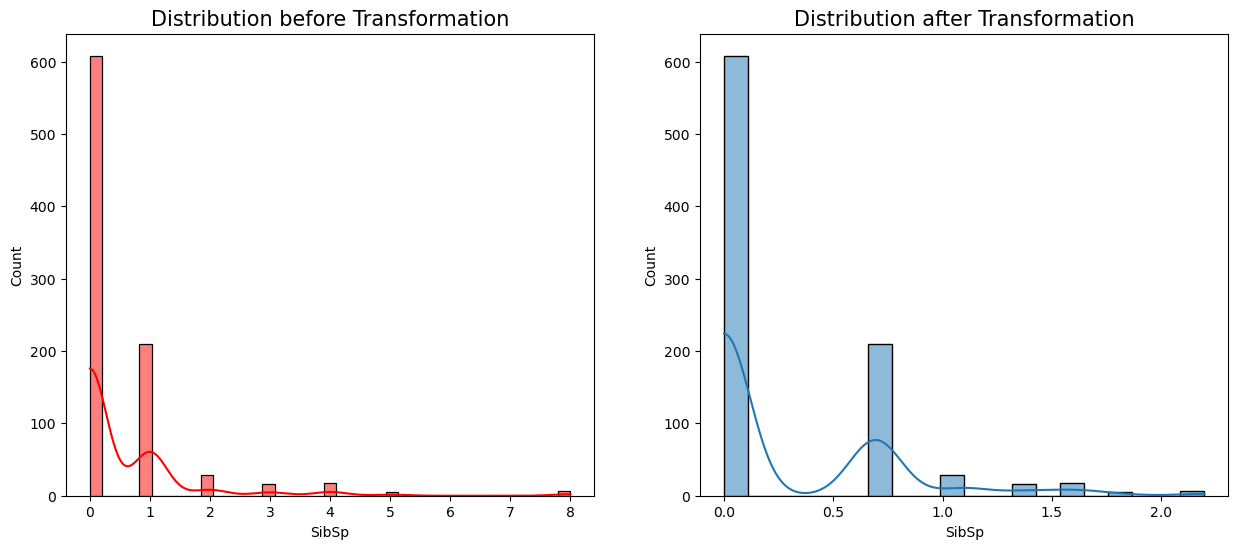

Skewness was 3.7 before & is 1.66 after Log transformation.


In [1038]:
df_train['SibSp']=logTrans('SibSp')

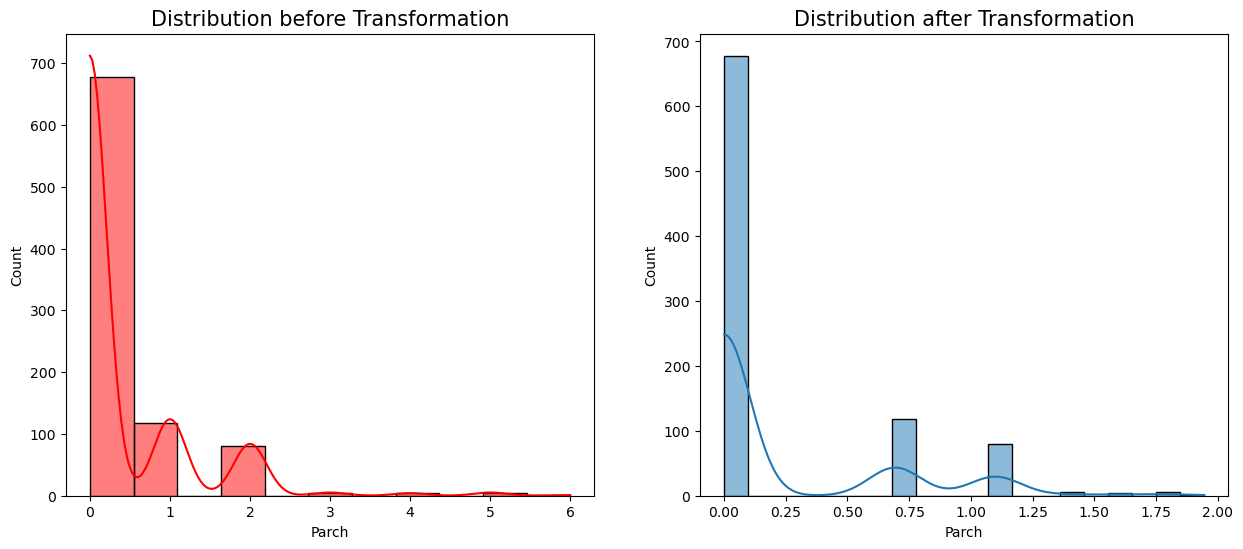

Skewness was 2.75 before & is 1.68 after Log transformation.


In [1039]:
df_train['Parch']=logTrans('Parch')

In [1040]:
df_train.shape

(891, 13)

In [1041]:
# def remove_outliers(df, features):
#     outliers_dict = {}
#     df_filtered = df.copy()
#     for feature in features:
#         q1 = df_filtered[feature].quantile(0.25)
#         q3 = df_filtered[feature].quantile(0.75)
#         iqr = q3 - q1
#         lower_tail = q1 - 1.5 * iqr
#         upper_tail = q3 + 1.5 * iqr
        
#         # Filter outliers
#         df_filtered = df_filtered[(df_filtered[feature] >= lower_tail) & (df_filtered[feature] <= upper_tail)]
        
#         # Collect outliers
#         outliers_df = df[(df[feature] < lower_tail) | (df[feature] > upper_tail)]
#         # outliers_dict[feature] = outliers_df
    
#     return df_filtered, outliers_df

# # List of features to remove outliers
# features_to_remove_outliers = ['Age','Parch', 'SibSp', 'Fare']

# # Call the function
# df_filtered, outliers_df = remove_outliers(df_train, features_to_remove_outliers)



In [1042]:
df_train.drop(['Name','Ticket'],axis=1,inplace=True)

In [1043]:
# df_train = pd.get_dummies(df_train) # Get OHE vectors of all cat. features
# df_train.head()

In [1044]:
df_train.replace({'male':0,'female':1},inplace=True)
df_train.replace({'S':0,'C':1,'Q':2},inplace=True)

In [1045]:
from sklearn.preprocessing import LabelEncoder

In [1046]:
labelenc=LabelEncoder()
df_train['Cabin']=labelenc.fit_transform(df_train['Cabin'])

In [1047]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,22.0,0.693147,0.0,2.110213,47,0,1
1,2,1,1,1,38.0,0.693147,0.0,4.280593,81,1,1
2,3,1,3,1,26.0,0.000000,0.0,2.188856,47,0,0
3,4,1,1,1,35.0,0.693147,0.0,3.990834,55,0,1
4,5,0,3,0,35.0,0.000000,0.0,2.202765,47,0,0


In [1048]:
from sklearn.model_selection import train_test_split

In [1049]:
X=df_train.drop('Survived',axis=1)
y=df_train['Survived']

In [1050]:
len(y)

891

In [1051]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [1052]:
len(y_train)

712

In [1053]:
from sklearn.ensemble import RandomForestClassifier

In [1054]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [1055]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [1056]:
y_pred_train = rf_clf.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print("Train data accuracy is:",train_accuracy)

Train data accuracy is: 1.0


In [1057]:
y_pred_test = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("Test data accuracy is:",test_accuracy)

Test data accuracy is: 0.8435754189944135


In [1058]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1059]:
hyp = { 'n_estimators' : np.arange(10,500), # 10 to 500 
        'criterion' : ['gini','entropy'],
        'min_samples_split': np.arange(2,50),
        'min_samples_leaf' : np.arange(1,50),
        'max_depth' : np.arange(2,30)}

rf_clf = RandomForestClassifier(random_state=10)
rscv_rf_clf = RandomizedSearchCV(rf_clf,hyp, cv = 8)
rscv_rf_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37...
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499])})

In [1060]:
rscv_rf_clf.best_params_

{'n_estimators': 458,
 'min_samples_split': 21,
 'min_samples_leaf': 3,
 'max_depth': 12,
 'criterion': 'gini'}

In [1061]:
best_rf = rscv_rf_clf.best_estimator_

In [1062]:
# rf_clf = RandomForestClassifier(n_estimators= 500,
#  min_samples_split= 40,
#  min_samples_leaf=7,
#  max_depth= 20,
#  criterion='gini',random_state=10)
# rf_clf.fit(X_train,y_train)

In [1063]:
y_pred_test = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("Test data accuracy is:",test_accuracy)

Test data accuracy is: 0.8659217877094972


In [1064]:
import xgboost as xgb

In [1065]:
X=df_train.drop('Survived',axis=1)
y=df_train['Survived']

In [1066]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [1067]:
clf = xgb.XGBClassifier() 

In [1068]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1069]:
ypred = clf.predict(X_test)

In [1070]:
accuracy = accuracy_score(y_test, ypred)
print("Test accuracy is ",accuracy)

Test accuracy is  0.8212290502793296


In [1071]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [1072]:
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=3, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='accuracy')

In [1073]:
best_params = random_search.best_params_
best_score = random_search.best_score_


In [1074]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.01}
Best Score: 0.8089978607476747


In [1075]:
best_model = random_search.best_estimator_
ypred = best_model.predict(X_test)

In [1076]:
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8547486033519553


In [1077]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1078]:
df_test.drop(['Name','Ticket'],axis=1,inplace=True)

In [1079]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1080]:
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())
df_test['Cabin']=df_test['Cabin'].fillna(df_test['Cabin'].mode()[0])

In [1081]:
df_test['Sex']=df_test['Sex'].replace({'male':0,'female':1})
df_test['Embarked']=df_test['Embarked'].replace({'S':0,'C':1,'Q':2})
df_test['Cabin']=labelenc.fit_transform(df_test['Cabin'])

In [1082]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.50000,0,0,7.8292,15,2
1,893,3,1,47.00000,1,0,7.0000,15,0
2,894,2,0,62.00000,0,0,9.6875,15,2
3,895,3,0,27.00000,0,0,8.6625,15,0
4,896,3,1,22.00000,1,1,12.2875,15,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,15,0
414,1306,1,1,39.00000,0,0,108.9000,22,1
415,1307,3,0,38.50000,0,0,7.2500,15,0
416,1308,3,0,30.27259,0,0,8.0500,15,0


In [1083]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

In [1084]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

In [1085]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

<AxesSubplot: xlabel='Fare', ylabel='Count'>

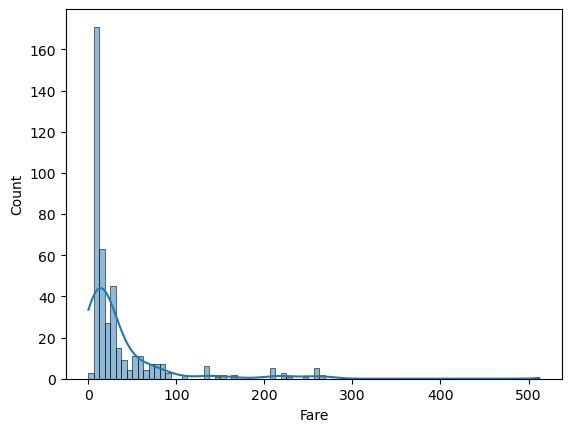

In [1086]:
sns.histplot(data=df_test,x=df_test['Fare'],kde=True)

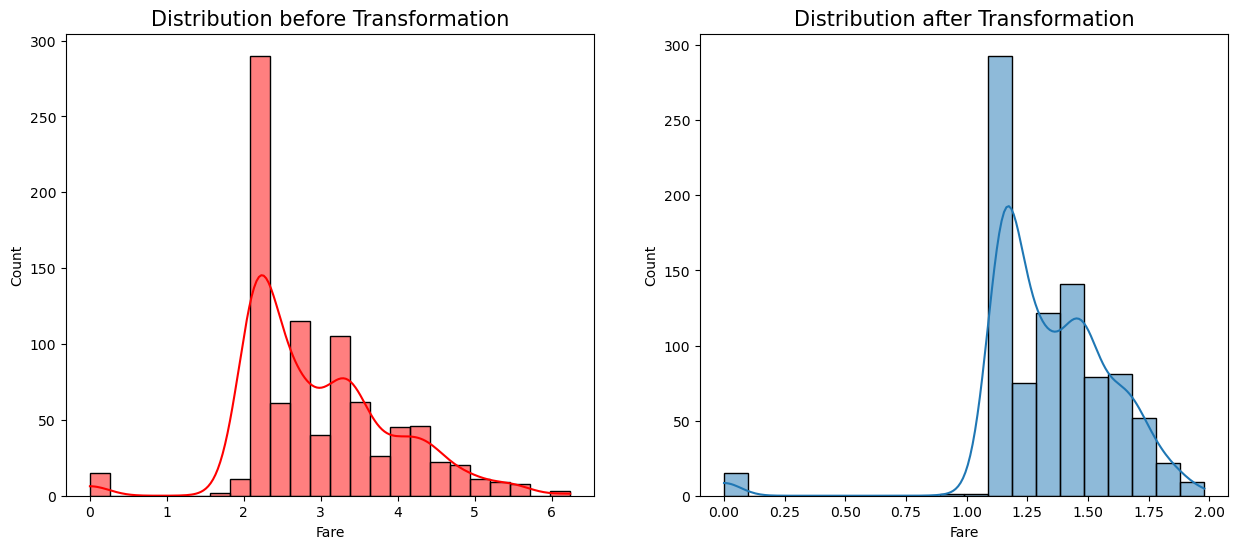

Skewness was 4.79 before & is -1.61 after Log transformation.


In [ ]:
df_test['Fare']=logTrans('Fare') 
df_test['SibSp']=logTrans('SibSp') 
df_test['Parch']=logTrans('Parch') 

In [ ]:
df_test

In [ ]:
y_pred_test = best_rf.predict(df_test)  #random forest


In [ ]:
df_test['Survived']=y_pred_test
dfresult=df_test[['PassengerId','Survived']]

In [ ]:
dfresult.to_csv("RANDOM_FOREST PREDICTIONS.csv",index=False)

In [ ]:
df_test.drop('Survived',axis=1,inplace=True)

In [ ]:
y_pred_test = best_model.predict(df_test)

In [ ]:
df_test['Survived']=y_pred_test
dfresult=df_test[['PassengerId','Survived']]

In [ ]:
dfresult=dfresult[['PassengerId','Survived']]


In [ ]:
dfresult.to_csv("XGBOOST_predictions.csv",index=False)